# Классификация космических объектов

Набор данных, используемый здесь, предназначен для классификации звезд, галактик и квазаров на основе их спектральных характеристик. Задача на сегодня попробовать обучить нейросеть на этих данных.

## Подготовка и анализ

Импортируем модули, необходимые для этого раздела

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

Загружаем данные

In [2]:
df = pd.read_csv('star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


**obj_ID** = Идентификатор объекта - уникальное значение, которое идентифицирует объект в каталоге изображений, используемом центром сертификации   

Координаты:  
**alpha** = Прямое восхождение (в эпоху J2000)     
**delta** = Угол склонения (в эпоху J2000)    
  
Измерения яркости объекта в пяти различных спектральных фильтрах:  
**u** = Ультрафиолетовый фильтр в фотометрической системе    
**g** = Зеленый фильтр в фотометрической системе    
**r** = Красный фильтр в фотометрической системе    
**i** = Фильтр ближнего инфракрасного диапазона в фотометрической системе    
**z** = Инфракрасный фильтр в фотометрической системе    
  
**run_ID** = Номер запуска, используемый для идентификации конкретного сканирования    
**rereun_ID** = Номер повторного запуска, чтобы указать, как было обработано изображение    
**cam_col** = Колонка камеры для определения линии сканирования во время выполнения    
**field_ID** = Номер поля для идентификации каждого поля    
**spec_obj_ID** = Уникальный идентификатор, используемый для оптических спектроскопических объектов (это означает, что 2 разных наблюдения с одинаковым spec_obj_ID должны иметь общий выходной класс)    
**class** = класс объекта (галактика, звезда или квазар)    
**redshift** = значение красного смещения, основанное на увеличении длины волны    
**plate** = идентификатор пластины, идентифицирующий каждую пластину в SDSS    
**MJD** = Измененная юлианская дата, используемая для указания того, когда был получен данный фрагмент данных SDSS    
**fiber_ID** = идентификатор волокна, который идентифицирует волокно, направлявшее свет в фокальную плоскость при каждом наблюдении    

Выведем общую информацию о датасете

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

В датасете представлено 18 столбцов различного рода типа данных (float64 и int64), а целевая переменная class представлена в виде назакодированного object

Посмотрим на описательную статистику 

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.drop(['obj_ID', 'spec_obj_ID'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,100000.00000,177.62912,96.50224,0.00553,127.51822,180.90070,233.89500,359.99981
delta,100000.00000,24.13530,19.64467,-18.78533,5.14677,23.64592,39.90155,83.00052
u,100000.00000,21.98047,31.76929,-9999.00000,20.35235,22.17914,23.68744,32.78139
g,100000.00000,20.53139,31.75029,-9999.00000,18.96523,21.09983,22.12377,31.60224
r,100000.00000,19.64576,1.85476,9.82207,18.13583,20.12529,21.04478,29.57186
i,100000.00000,19.08485,1.75789,9.46990,17.73228,19.40514,20.39650,32.14147
z,100000.00000,18.66881,31.72815,-9999.00000,17.46068,19.00460,19.92112,29.38374
run_ID,100000.00000,4481.36606,1964.76459,109.00000,3187.00000,4188.00000,5326.00000,8162.00000
rerun_ID,100000.00000,301.00000,0.00000,301.00000,301.00000,301.00000,301.00000,301.00000
cam_col,100000.00000,3.51161,1.58691,1.00000,2.00000,4.00000,5.00000,6.00000


Стоит смотреть на следующие столбцы: u, g, r, i, z, alpha, delta и redshift, т.к. именно они дают необходимую информацию о типе космического объекта.  
Если брать только эти столбцы, то аномалии заметны в u, g и z, так как значения яркости объекта не может быть отрицательной.

Посмотрим на распределение без обработки

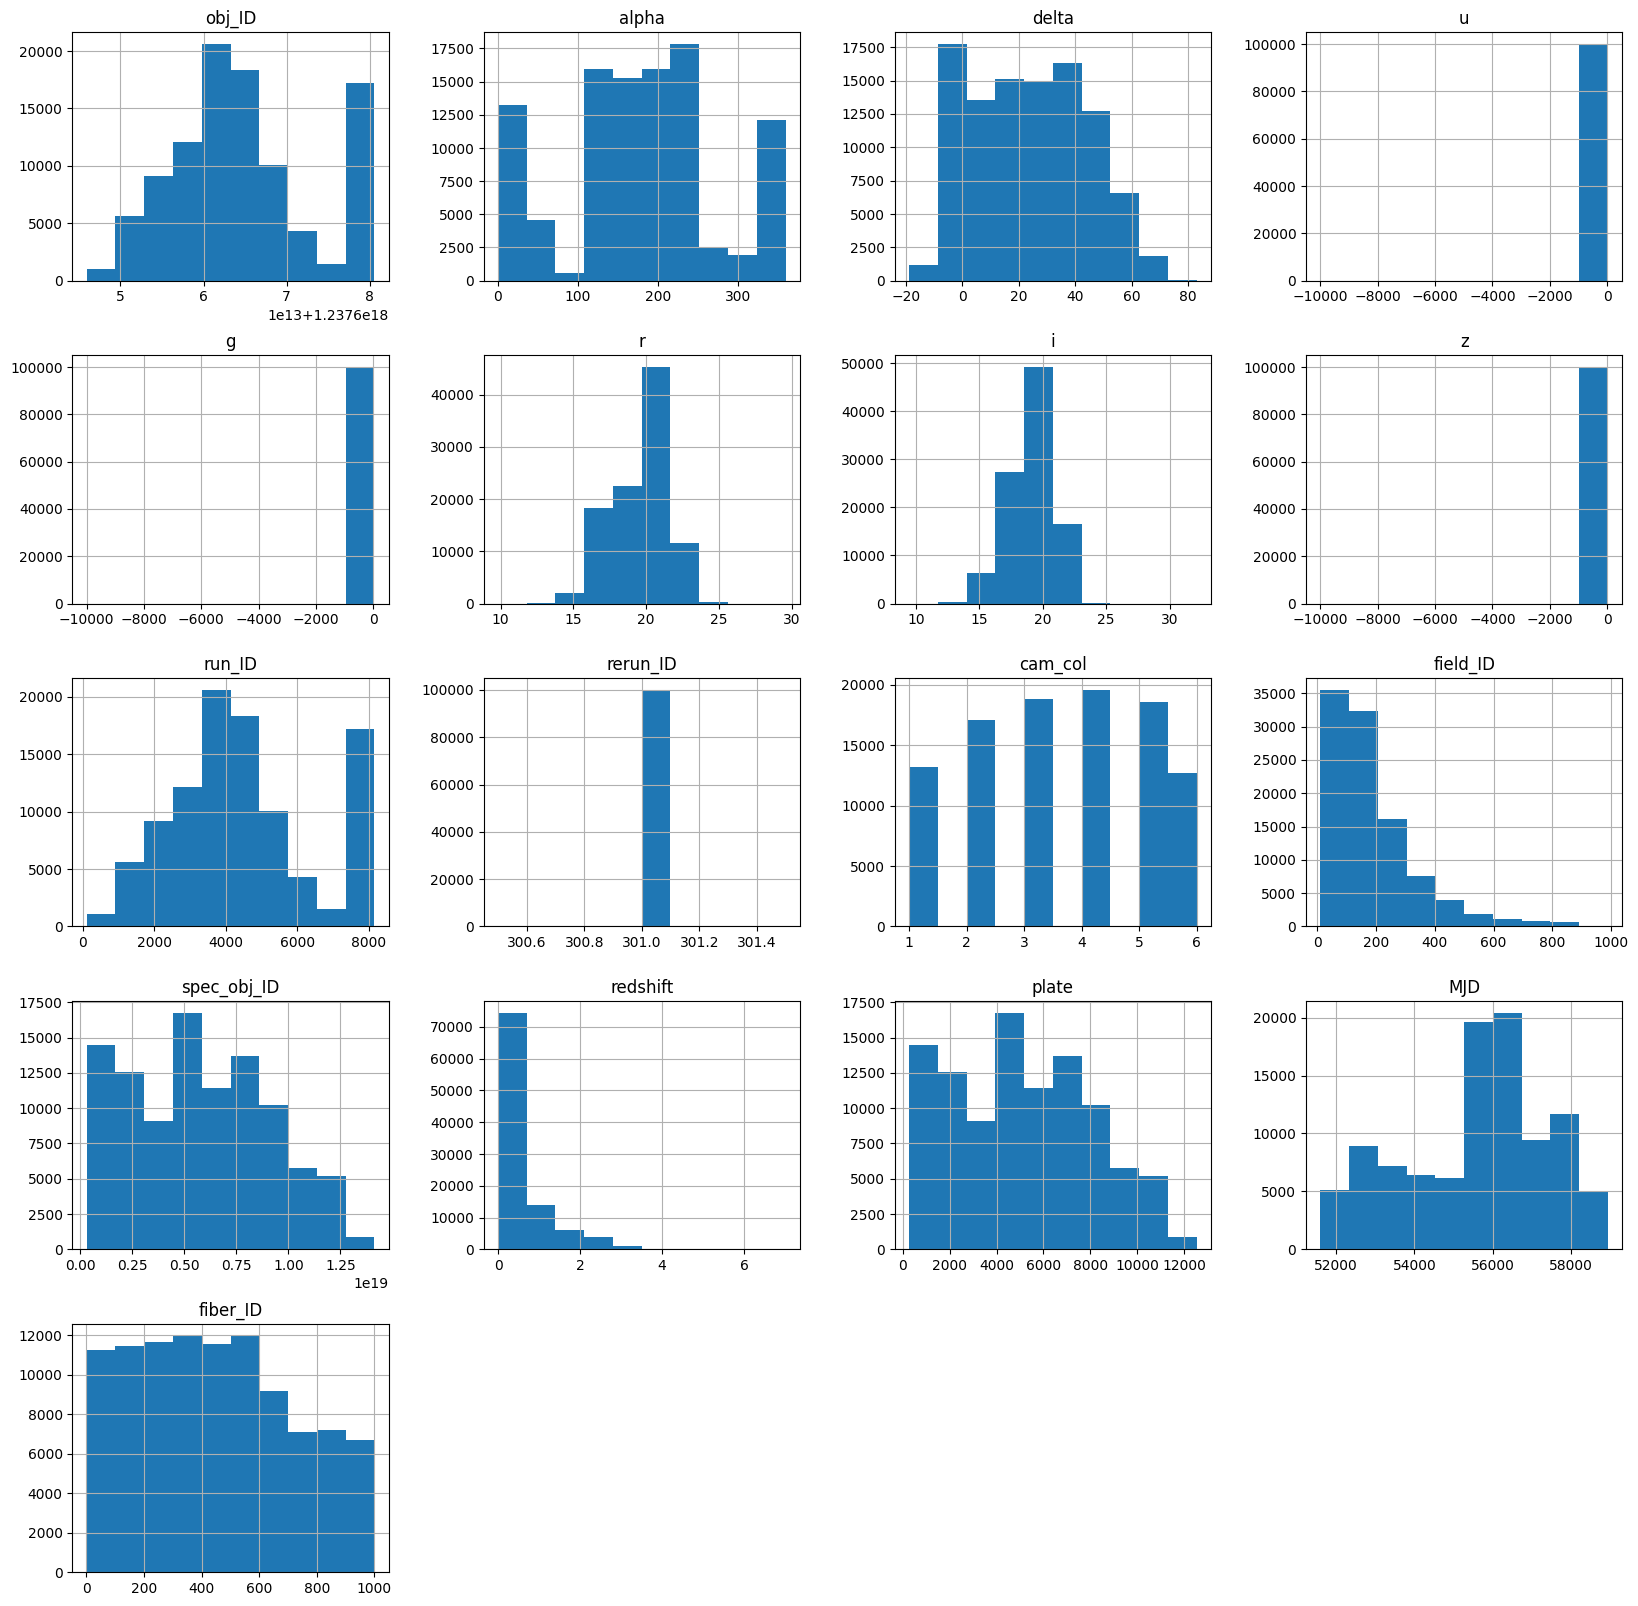

In [5]:
df.hist(figsize=(20, 20));

Нормальное распределение имеют пока только r и i, красное смещение не имеет нормального распределение, т.к. это обусловлено тем, что во вселенной не так много объектов с большим красным смещением.

Взглянем на распределение классов

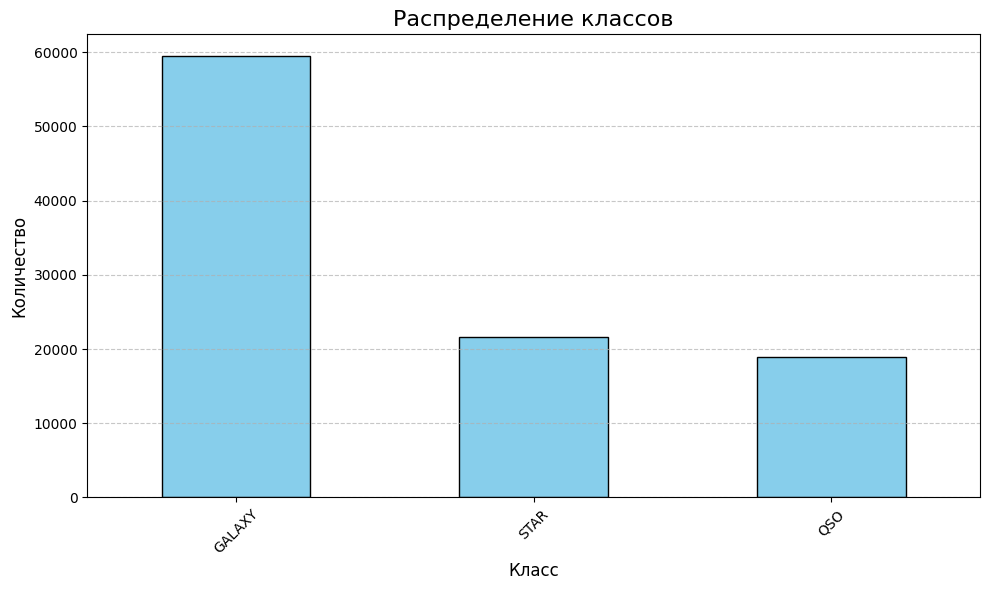

In [6]:
class_counts = df['class'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Распределение классов', fontsize=16)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Виден дисбаланс в пользу количества галактик

Обработаем аномалии в столбцах с яркостью

In [7]:
photometry_columns = ['u', 'g', 'r', 'i', 'z'] 

for column in photometry_columns:
    anomaly_df = df[df[column] <= 0]
    print(f"Аномалии в столбце {column}: {anomaly_df.shape[0]}")

Аномалии в столбце u: 1
Аномалии в столбце g: 1
Аномалии в столбце r: 0
Аномалии в столбце i: 0
Аномалии в столбце z: 1


In [8]:
for column in photometry_columns:
    anomaly_df = df[df[column] <= 0]
    df = df.drop(anomaly_df.index)

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(99999, 18)

По видимому таких аномальных записей была всего лишь одна

Из описания spec_obj_ID можно узнать следующее "2 разных наблюдения с одинаковым spec_obj_ID должны иметь общий выходной класс". Посмотрим на это

In [10]:
duplicates = df[df.duplicated(subset=['spec_obj_ID'], keep=False)]
duplicates

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


Дубликатов по spec_obj_ID вовсе нет

Посмотрим на распределение после обработки

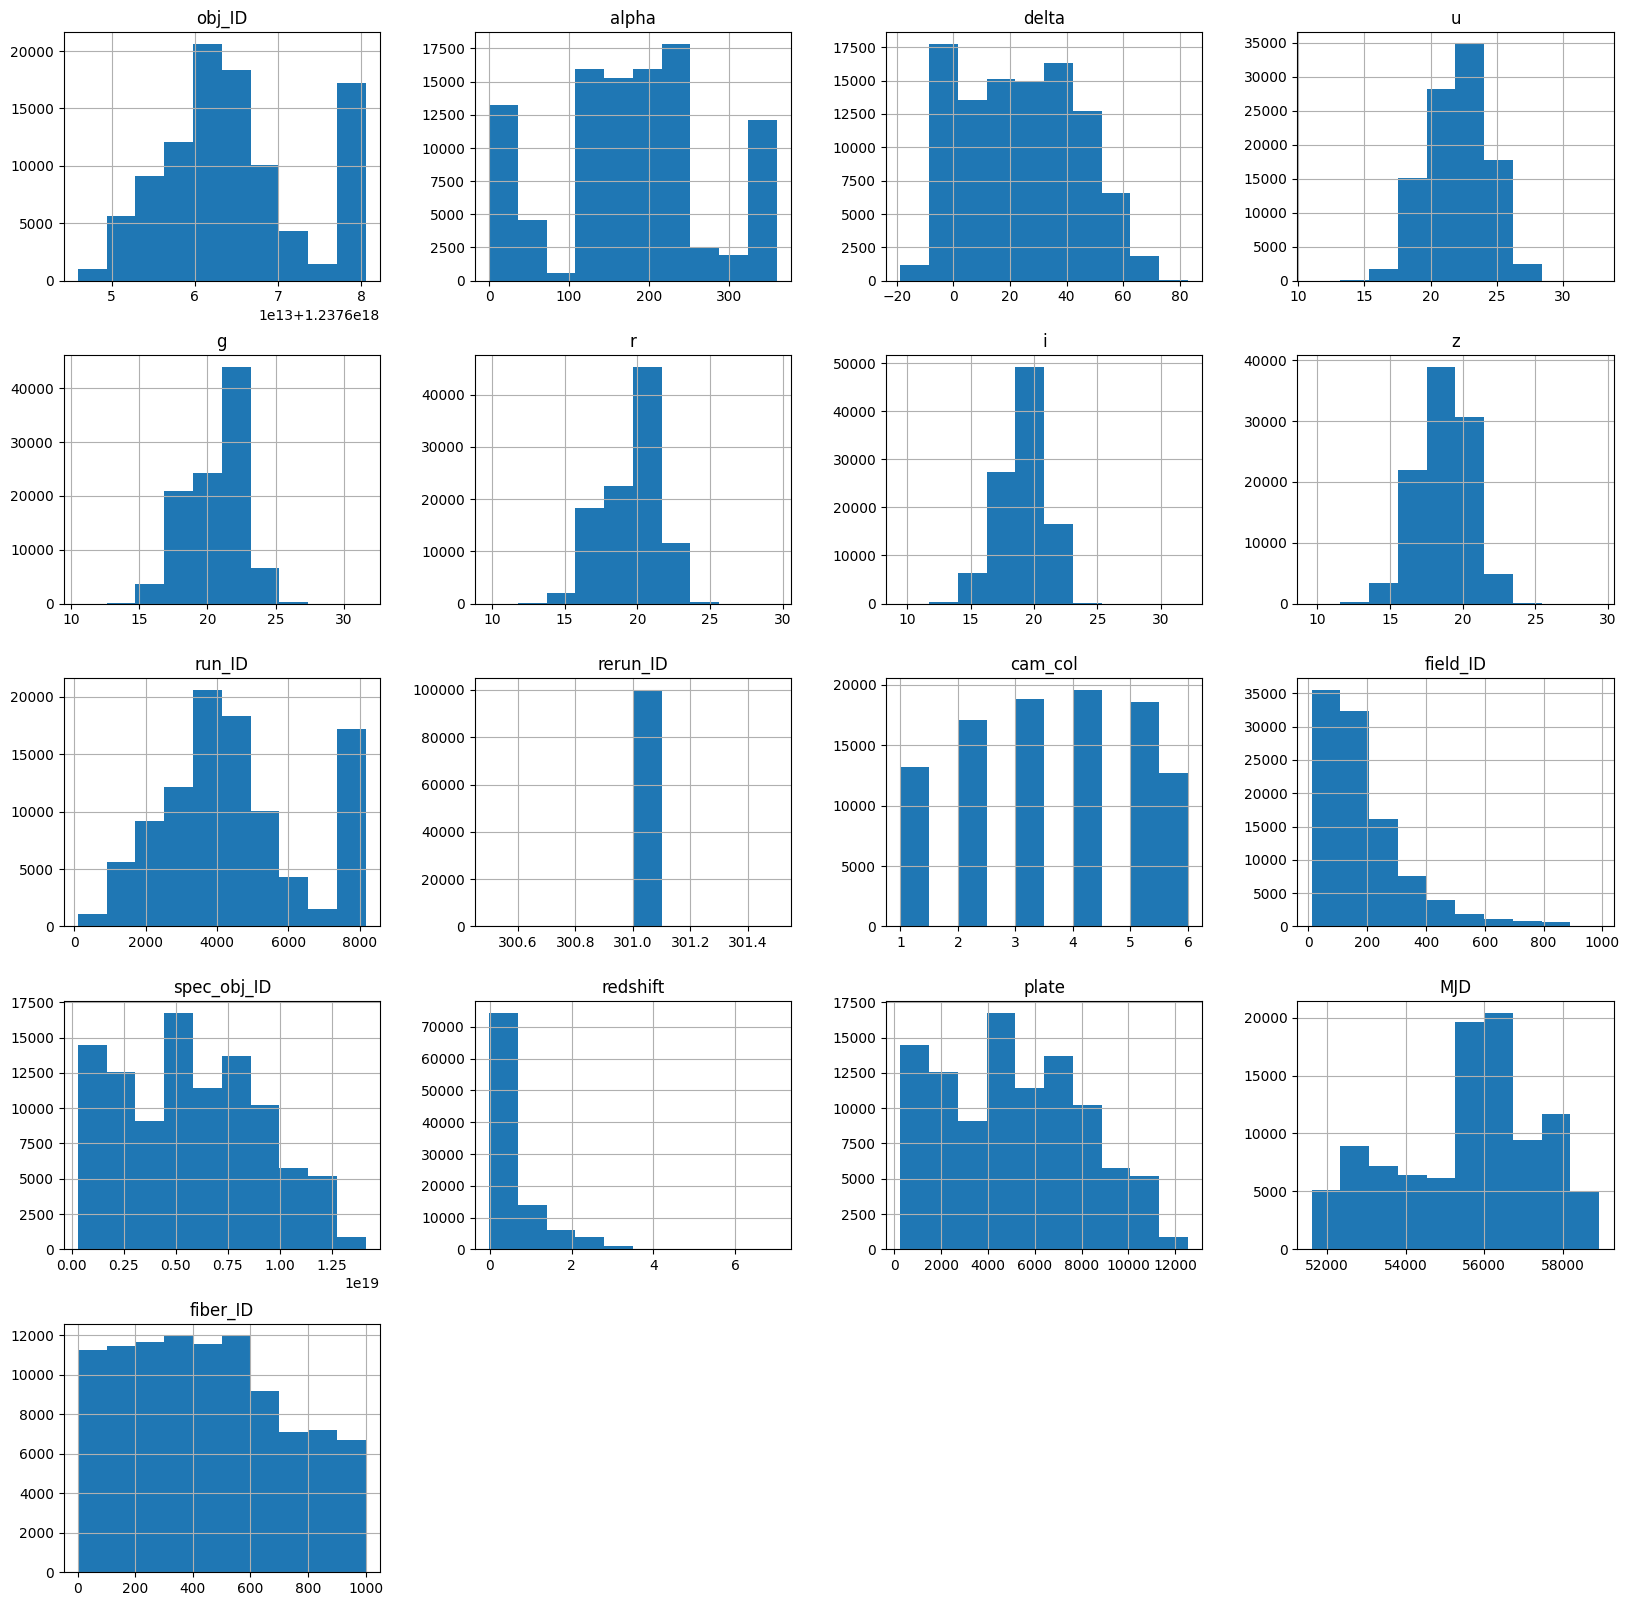

In [11]:
df.hist(figsize=(20, 20));

Как и ожидалось, все столбцы яркости космического объекта стали иметь нормально распределение.

Посмотрим красное смещение по классам, т.к. от объекта к объекту оно может иметь свой определённый диапазон

In [12]:
df_classes = ['GALAXY', 'QSO', 'STAR']

for df_class in df_classes:
    print(df_class)
    display(df[df['class'] == df_class]['redshift'].describe())
    print('\n\n')

GALAXY


count   59445.00000
mean        0.42160
std         0.26486
min        -0.00997
25%         0.16453
50%         0.45627
75%         0.59470
max         1.99552
Name: redshift, dtype: float64




QSO


count   18961.00000
mean        1.71968
std         0.91395
min         0.00046
25%         1.10661
50%         1.61723
75%         2.22028
max         7.01124
Name: redshift, dtype: float64




STAR


count   21593.00000
mean       -0.00011
std         0.00047
min        -0.00414
25%        -0.00030
50%        -0.00008
75%         0.00008
max         0.00415
Name: redshift, dtype: float64

Здесь всё нормально, нет аномально больших и аномально низких показателей

Проанализируем лучше распределение красного смещения на кадом классе подробнее

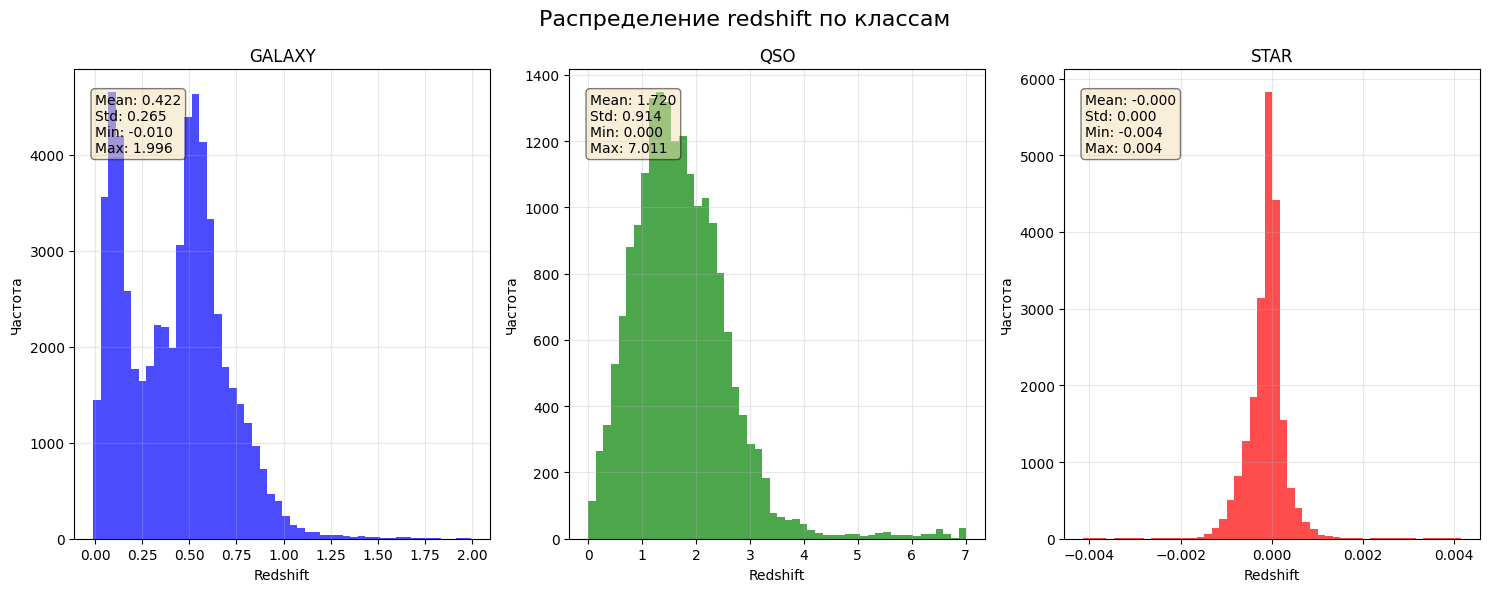

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

colors = {'GALAXY': 'blue', 'QSO': 'green', 'STAR': 'red'}

for i, df_class in enumerate(df_classes):
    subset = df[df['class'] == df_class]['redshift']
    
    axes[i].hist(subset, bins=50, alpha=0.7, color=colors.get(df_class, 'gray'))
    axes[i].set_title(f'{df_class}')
    axes[i].set_xlabel('Redshift')
    axes[i].set_ylabel('Частота')
    axes[i].grid(True, alpha=0.3)
    
    stats_text = f'Mean: {subset.mean():.3f}\nStd: {subset.std():.3f}\n'
    stats_text += f'Min: {subset.min():.3f}\nMax: {subset.max():.3f}'
    axes[i].text(0.05, 0.95, stats_text, transform=axes[i].transAxes,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Распределение redshift по классам', fontsize=16)
plt.tight_layout()
plt.show()

Видно, что у звезды самый оперделённый диапазон и в среднем самое маельнкое красное смещение, в то время как у квазаров оно статистически больше. Галактики же это что-то среднее.

Закодируем данные о классе

In [15]:
def class_coder(x):
    if x == 'STAR':
        return 0
    if x == 'GALAXY':
        return 1
    return 2

df['class'] = df['class'].apply(class_coder)
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232.00000,135.68911,32.49463,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6543777369295181824.00000,1,0.63479,5812,56354,171
1,1237664879951151104.00000,144.82610,31.27418,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,11760142036707334144.00000,1,0.77914,10445,58158,427
2,1237660961330430208.00000,142.18879,35.58244,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5152200256025548800.00000,1,0.64419,4576,55592,299
3,1237663478724297984.00000,338.74104,-0.40283,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,10301071412954419200.00000,1,0.93235,9149,58039,775
4,1237680272041378048.00000,345.28259,21.18387,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6891864880783316992.00000,1,0.11612,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237678879964201472.00000,39.62071,-2.59407,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,10554306253273999360.00000,1,0.00000,9374,57749,438
99996,1237679476408647936.00000,29.49382,19.79887,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8586350850183813120.00000,1,0.40490,7626,56934,866
99997,1237668298220634368.00000,224.58741,15.70071,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3112007759562827776.00000,1,0.14337,2764,54535,74
99998,1237661151383454208.00000,212.26862,46.66037,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7601079570549462016.00000,1,0.45504,6751,56368,470


Отлично, теперь построим корреляционную карту, чтобы посмотреть как признаки влияют на целевую переменную и друг на друга

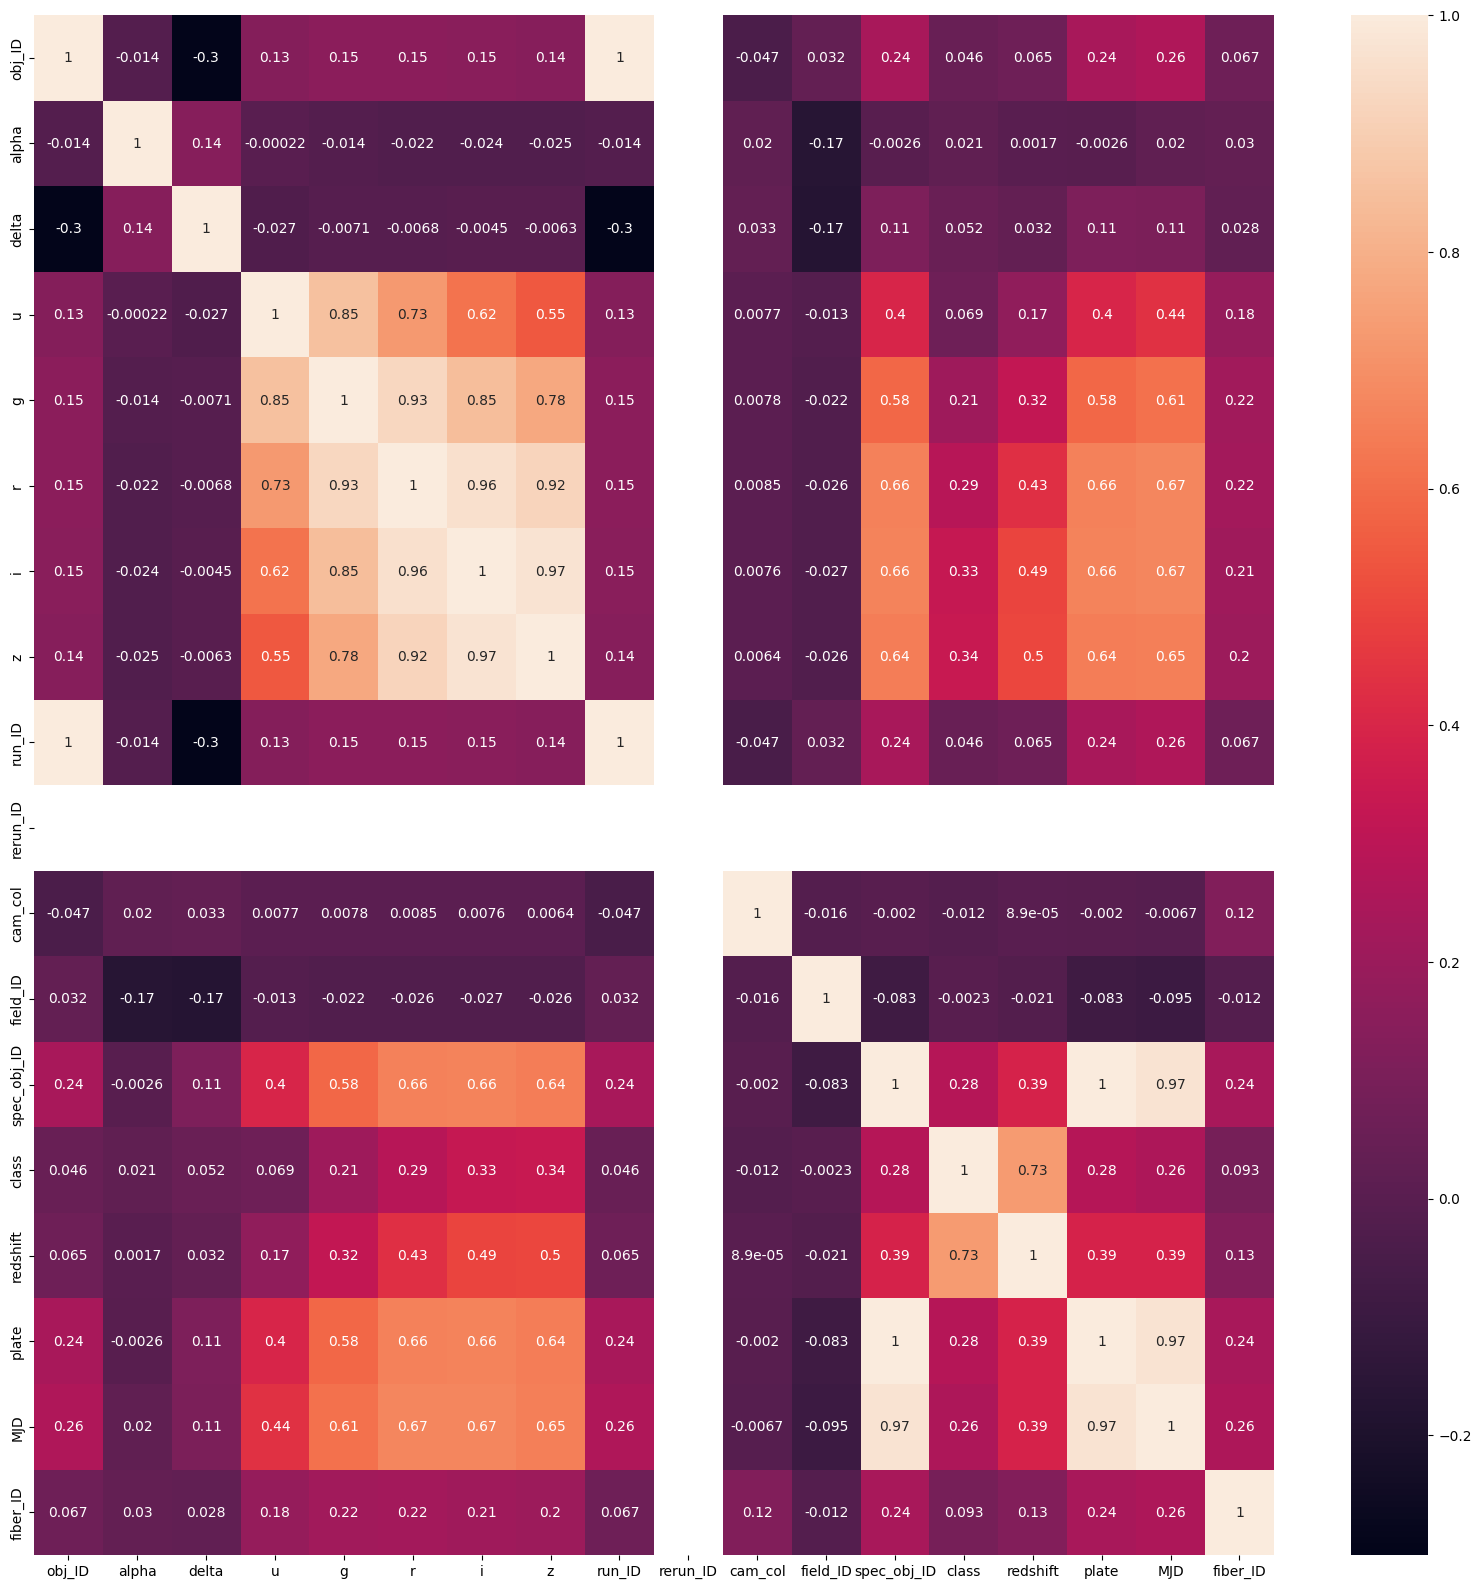

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True);

Сильные корреляции заметны между всеми признаками яркости, а на целевую переменную большое влияние оказывает красное смещение, что вполне реально

## Обучение модели

### Подготовка данных для обучения

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

C:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


В качестве признаков для обучения возьмём только самое важное: призанки яркости, координаты и красное смещение

In [18]:
X = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y= df['class']

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Нейросеть

Первым делом обучим нейросеть, ведь задача на этот датасет - показать, может ли нейросеть быть лучше менее "умных" алгоритмов обучения на больших данных.  
Архитектурая нейросети будет состоять из входного слоя, 3 полносвязных скрытых слоя и выходного для получения вероятностей.

In [19]:
# Строим модель
model = keras.Sequential([
    layers.Input(shape=(8,)),

    layers.Dense(128, activation='relu', name='input'),
    layers.Dense(64, activation='relu', name='hidden1'),
    layers.Dense(32, activation='relu', name='hidden2'),
    layers.Dense(16, activation='relu', name='hidden3'),
    layers.Dense(3, activation='softmax', name='output'),
])

# Компилируем её
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

# Смотрим на сводку
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,067 (47.14 KB)

 Trainable params: 12,067 (47.14 KB)

 Non-trainable params: 0 (0.00 B)

Ни один параметр не попал в параметры для перетренировки, а на всех уровнях их приемлимое количество, значит приступаем к обучению.

In [20]:
# Инициализируем коллбэк для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# Обучаем модель
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    callbacks=[early_stopping], 
    validation_data=(X_test, y_test)
)

Epoch 1/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7608 - loss: 0.5745 - val_accuracy: 0.7606 - val_loss: 0.5011
Epoch 2/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8804 - loss: 0.2966 - val_accuracy: 0.9174 - val_loss: 0.2359
Epoch 3/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9082 - loss: 0.2452 - val_accuracy: 0.9391 - val_loss: 0.2146
Epoch 4/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9224 - loss: 0.2141 - val_accuracy: 0.9117 - val_loss: 0.2148
Epoch 5/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9294 - loss: 0.2001 - val_accuracy: 0.9263 - val_loss: 0.1956
Epoch 6/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9327 - loss: 0.1961 - val_accuracy: 0.8494 - val_loss: 0.3692
Epoch 7/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9414 - loss: 0.1737 - val_accuracy: 0.9540 - val_loss: 0.1455
Epoch 8/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9407 - loss: 0

Обучение прошло все 100 эпох, однако лучшей оказалась 83 эпоха. Визуализируем процесс обучения для определения качества этого процесса.

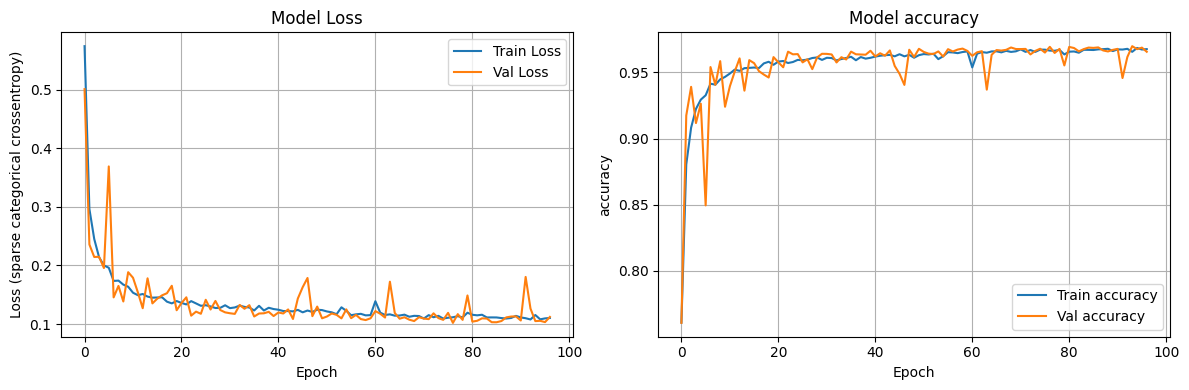

In [21]:
# Визуализация обучения
def plot_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Loss
    axes[0].plot(history.history['loss'], label='Train Loss')
    axes[0].plot(history.history['val_loss'], label='Val Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss (sparse categorical crossentropy)')
    axes[0].legend()
    axes[0].grid(True)
    
    # Accuracy
    axes[1].plot(history.history['accuracy'], label='Train accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Val accuracy')
    axes[1].set_title('Model accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('accuracy')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

plot_history(history)

На валидационных данных заметны скачки, однако в целом обучение прошло гладко.  
Сделаем предсказание.

In [22]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = y_pred.flatten()

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step


In [23]:
neiro_f1 = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))
print(neiro_f1)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6541
           1       0.98      0.97      0.97     17810
           2       0.95      0.92      0.93      5649

    accuracy                           0.97     30000
   macro avg       0.96      0.97      0.96     30000
weighted avg       0.97      0.97      0.97     30000

0.969212713511385


Нейросеть показала неплохие результаты - f1 score = 0.969, однако стоит посмотреть на другие модели далее.

### HistGradientBoosting

Следующим алгоритмом будет не просто градиентный бустинг, а его брат, который работает быстрее на больших данных.

In [24]:
model = HistGradientBoostingClassifier(
    max_iter=100,
    learning_rate=0.1,
    max_bins=255,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.2,
    random_state=42,
    verbose=1
)

# Обучаем модель
model.fit(X_train, y_train)

Binning 0.004 GB of training data: 0.028 s
Binning 0.001 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
Fit 186 trees in 2.856 s, (5766 total leaves)
Time spent computing histograms: 0.471s
Time spent finding best splits:  0.285s
Time spent applying splits:      0.380s
Time spent predicting:           0.019s


,"loss loss: {'log_loss'}, default='log_loss'The loss function to use in the boosting process.For binary classification problems, 'log_loss' is also known as logistic loss,binomial deviance or binary crossentropy. Internally, the model fits one treeper boosting iteration and uses the logistic sigmoid function (expit) asinverse link function to compute the predicted positive class probability.For multiclass classification problems, 'log_loss' is also known as multinomialdeviance or categorical crossentropy. Internally, the model fits one tree perboosting iteration and per class and uses the softmax function as inverse linkfunction to compute the predicted probabilities of the classes.",'log_loss'
,"learning_rate learning_rate: float, default=0.1The learning rate, also known as *shrinkage*. This is used as amultiplicative factor for the leaves values. Use ``1`` for noshrinkage.",0.1
,"max_iter max_iter: int, default=100The maximum number of iterations of the boosting process, i.e. themaximum number of trees for binary classification. For multiclassclassification, `n_classes` trees per iteration are built.",100
,"max_leaf_nodes max_leaf_nodes: int or None, default=31The maximum number of leaves for each tree. Must be strictly greaterthan 1. If None, there is no maximum limit.",31
,"max_depth max_depth: int or None, default=NoneThe maximum depth of each tree. The depth of a tree is the number ofedges to go from the root to the deepest leaf.Depth isn't constrained by default.",None
,"min_samples_leaf min_samples_leaf: int, default=20The minimum number of samples per leaf. For small datasets with lessthan a few hundred samples, it is recommended to lower this valuesince only very shallow trees would be built.",20
,"l2_regularization l2_regularization: float, default=0The L2 regularization parameter penalizing leaves with small hessians.Use ``0`` for no regularization (default).",0.0
,"max_features max_features: float, default=1.0Proportion of randomly chosen features in each and every node split.This is a form of regularization, smaller values make the trees weakerlearners and might prevent overfitting.If interaction constraints from `interaction_cst` are present, only allowedfeatures are taken into account for the subsampling... versionadded:: 1.4",1.0
,"max_bins max_bins: int, default=255The maximum number of bins to use for non-missing values. Beforetraining, each feature of the input array `X` is binned intointeger-valued bins, which allows for a much faster training stage.Features with a small number of unique values may use less than``max_bins`` bins. In addition to the ``max_bins`` bins, one more binis always reserved for missing values. Must be no larger than 255.",255
,"categorical_features categorical_features: array-like of {bool, int, str} of shape (n_features) or shape (n_categorical_features,), default='from_dtype'Indicates the categorical features.- None : no feature will be considered categorical.- boolean array-like : boolean mask indicating categorical features.- integer array-like : integer indices indicating categorical features.- str array-like: names of categorical features (assuming the training data has feature names).- `""from_dtype""`: dataframe columns with dtype ""category"" are considered to be categorical features. The input must be an object exposing a ``__dataframe__`` method such as pandas or polars DataFrames to use this feature.For each categorical feature, there must be at most `max_bins` uniquecategories. Negative values for categorical features encoded as numericdtypes are treated as missing values. All categorical values areconverted to floating point numbers. This means that categorical valuesof 1.0 and 1 are treated as the same category.Read more in the :ref:`User Guide `... versionadded:: 0.24.. versionchanged:: 1.2 Added support for feature names... versionchanged:: 1.4 Added `""from_dtype""` option... versionchanged:: 1.6 The default value changed from `None` to `""from_dtype""`.",'from_dt

Делаем предсказание и смотрим на метрики

In [25]:
y_pred = model.predict(X_test)

In [26]:
hgb_f1 = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6541
           1       0.98      0.98      0.98     17810
           2       0.96      0.93      0.94      5649

    accuracy                           0.98     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000

0.9755420195421683


И градиентный бустинг уже показал результаты лучше, чем у нейросети - f1 score = 0.976. Для чистоты сравнения возьмём ещё одну модель.

### CatBoostClassifier

В этот раз берём CatBoost - мощная модель от яндекс.

In [27]:
model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    verbose=0,
    random_state=42
)

# Обучаем модель
model.fit(X_train, y_train)

И снова делаем предсказание и смотрим на метрики

In [28]:
y_pred = model.predict(X_test)

In [29]:
cb_f1 = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))
print(cb_f1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6541
           1       0.97      0.98      0.98     17810
           2       0.96      0.93      0.94      5649

    accuracy                           0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000

0.974640528497965


Результаты схожи с градиентным бустингом и всё ещё лучше чем у нейросети - f1 score = 0.975.

# Сравнение и выводы

Для наглядного сравнения построим гистограмму

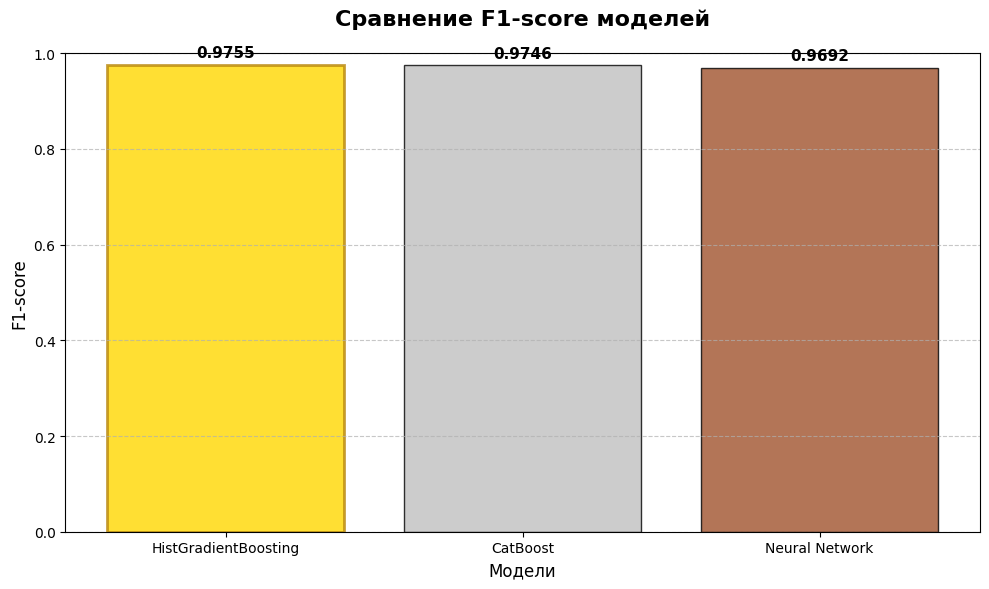

In [37]:
models = ['CatBoost', 'HistGradientBoosting', 'Neural Network']
f1_scores = [cb_f1, hgb_f1, neiro_f1]

sorted_indices = np.argsort(f1_scores)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_scores = [f1_scores[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_models, sorted_scores, 
               color=['gold', 'silver', 'sienna'] if len(models) == 3 else 'skyblue',
               edgecolor='black', alpha=0.8)

plt.title('Сравнение F1-score моделей', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Модели', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

bars[0].set_color('gold')
bars[0].set_edgecolor('darkgoldenrod')
bars[0].set_linewidth(2)

for bar, score in zip(bars, sorted_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

Самой лучшей моделью оказался HistGradientBoosting. Помимо этого, модели бустингов обучались в разы быстрее. Конечно набор данных можно было бы расширить, сгенерировав доп. данные для балансировки классов, и тогда если бы было ещё больше данных, нейросеть бы показала себя лучше. 
  
Конечно же постройка архитектуры нейросети сложнее чем подбор параметров к моделям из sklearn и прочих бибилотек, и это вполне могло повлиять на конечные результаты, но пока нейросеть показывает результаты хуже на подобных задачах классификации/регрессии.